# Heart Failure Classification


## Import modules


In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as mt
from metrics import Metrics

## Dataset Loading


In [2]:
path = "data/heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(path)
data.head()
metrics = Metrics()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Visualizations


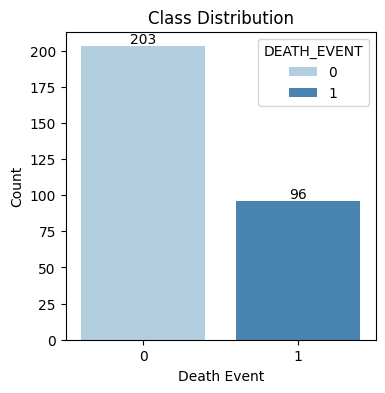

In [6]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="DEATH_EVENT", data=data, palette="Blues", hue="DEATH_EVENT")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Class Distribution")
plt.xlabel("Death Event")
plt.ylabel("Count")
plt.show()

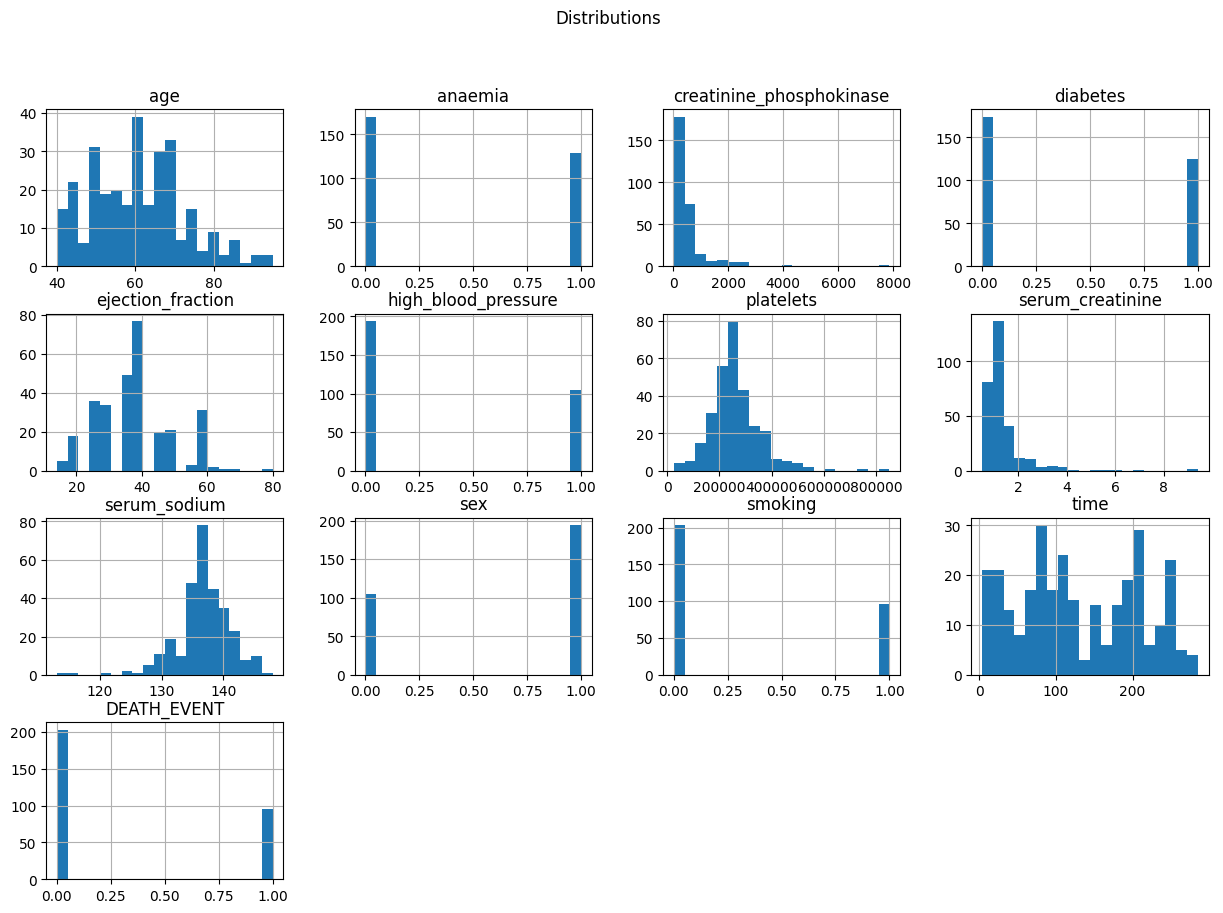

In [7]:
data.hist(figsize=(15, 10), bins=20)
plt.suptitle("Distributions")
plt.show()

In [8]:
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]
numerical_features = [
    "age",
    "creatinine_phosphokinase",
    "ejection_fraction",
    "platelets",
    "serum_creatinine",
    "serum_sodium",
    "time",
]

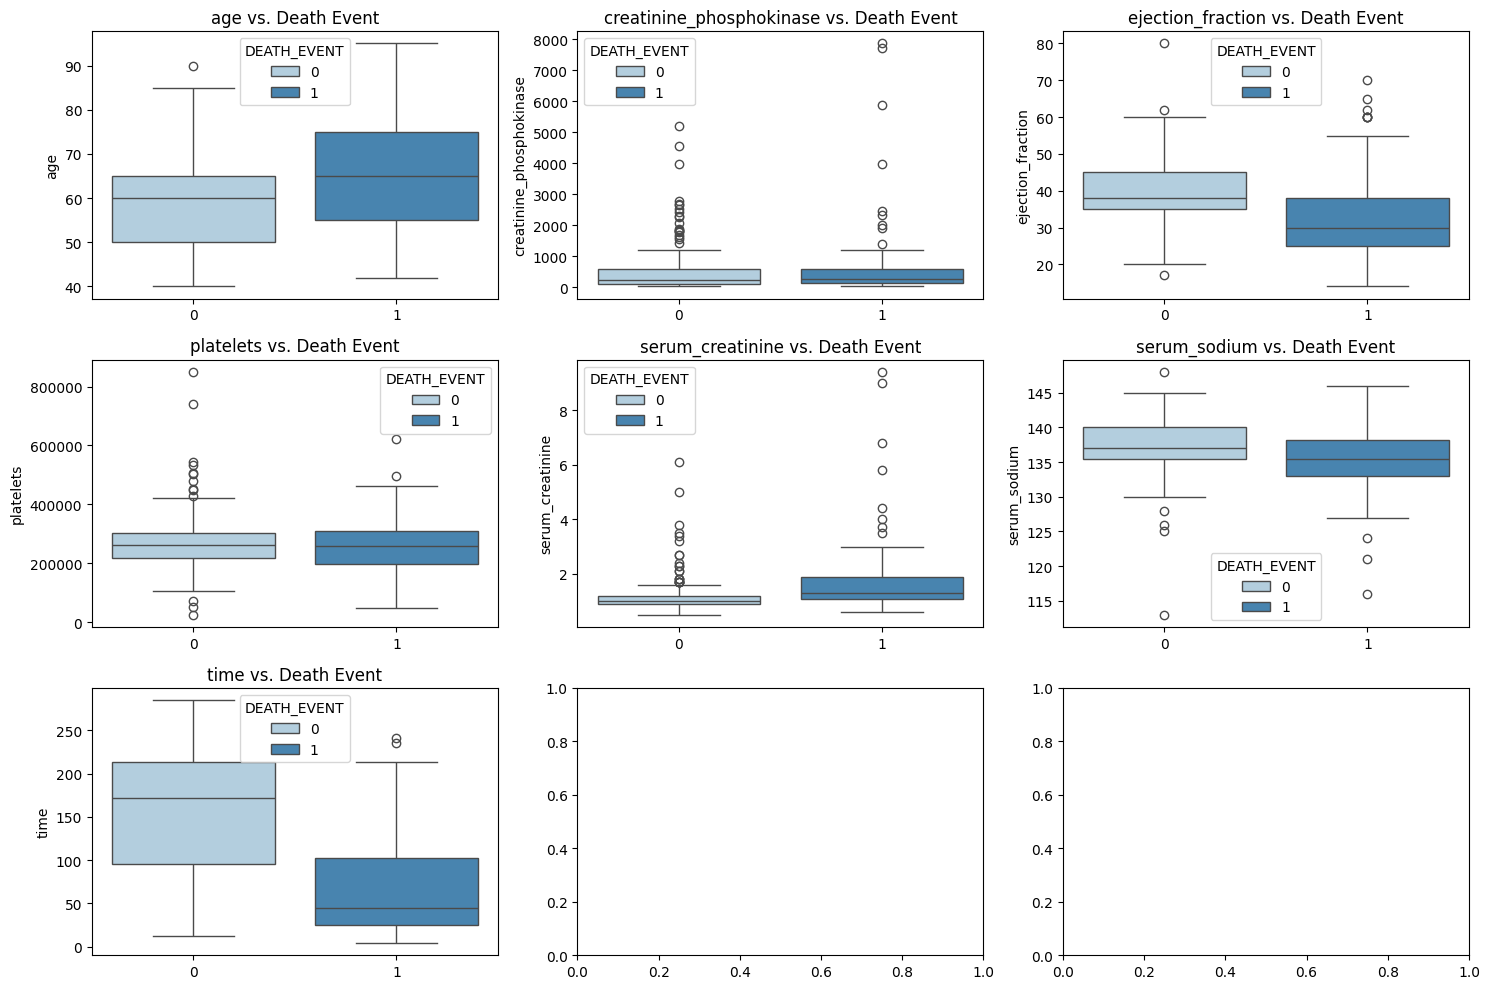

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.boxplot(
        x="DEATH_EVENT",
        y=feature,
        data=data,
        palette="Blues",
        ax=axes[i],
        hue="DEATH_EVENT",
    )
    axes[i].set_title(f"{feature} vs. Death Event")
    axes[i].set_xlabel(None)
plt.tight_layout()
plt.show()

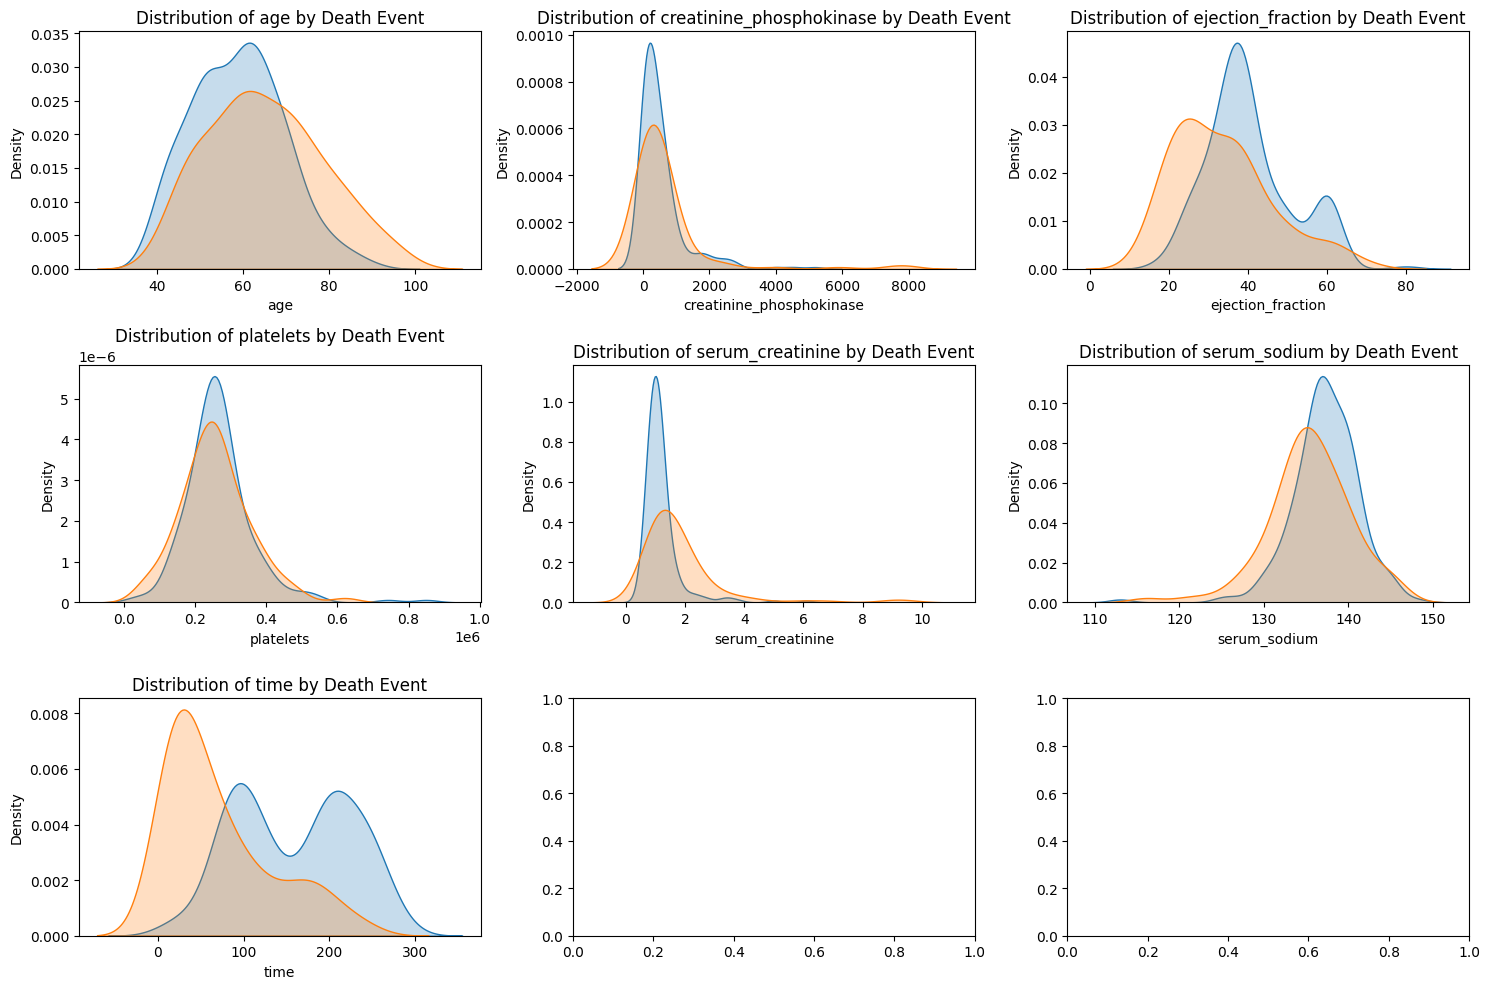

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.kdeplot(data[feature][data["DEATH_EVENT"] == 0], ax=axes[i], fill=True)
    sns.kdeplot(data[feature][data["DEATH_EVENT"] == 1], ax=axes[i], fill=True)
    axes[i].set_title(f"Distribution of {feature} by Death Event")
plt.tight_layout()
plt.show()

## Preprocessing features and labels


In [11]:
data["age"] = data["age"].astype(int)
X, y = data.drop("DEATH_EVENT", axis=1), data["DEATH_EVENT"]
X["platelets"] = np.log(X["platelets"])
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Decision Tree


### Load Model


In [12]:
model = DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

### Find best parameter using GridSearchCV


In [13]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

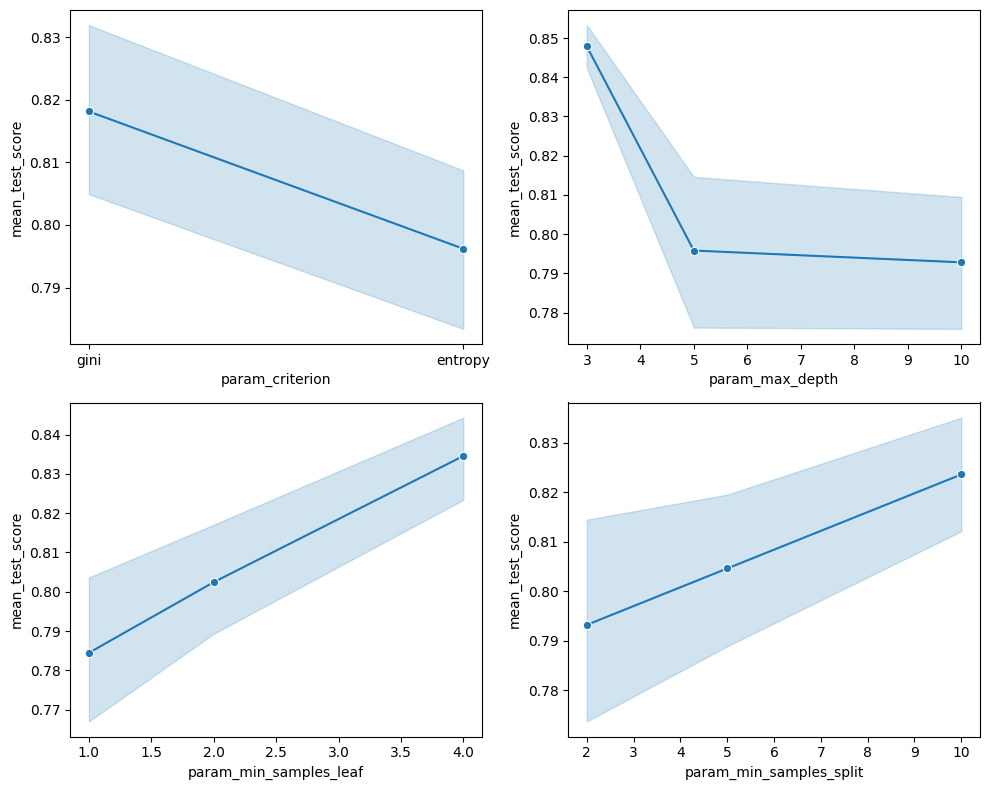

In [14]:
results = pd.DataFrame(grid_search.cv_results_)
param_columns = [col for col in results if col.startswith("param_")]
results = results[param_columns + ["mean_test_score"]]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, param in enumerate(param_columns):
    sns.lineplot(x=param, y="mean_test_score", marker="o", ax=axes[i], data=results)
plt.tight_layout()
plt.show()

### Visualize ROC Curve


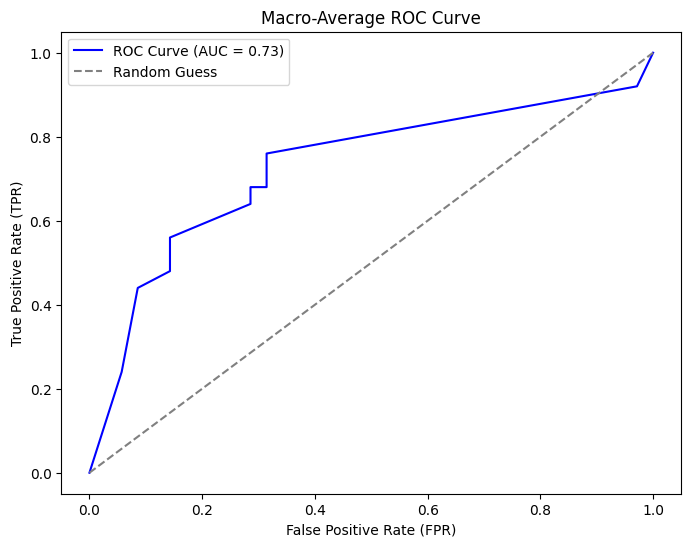

In [15]:
best_model = DecisionTreeClassifier(
    criterion="entropy", max_depth=5, min_samples_leaf=4, min_samples_split=10
)
best_model.fit(X_train, y_train)
y_score = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = mt.roc_curve(y_test, y_score)
roc_auc = mt.roc_auc_score(y_test, y_score, average="macro")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=(f"ROC Curve (AUC = {roc_auc:.2f})"))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Macro-Average ROC Curve")
plt.legend()
plt.show()

### Evaluate model using optimized threshold


In [16]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_score = (y_score >= optimal_threshold).astype(int)
metrics.evaluate(y_test, y_score, "Decision Tree")

## Random Forest


### Load Model


In [17]:
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Find best parameter using GridSearchCV


In [18]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

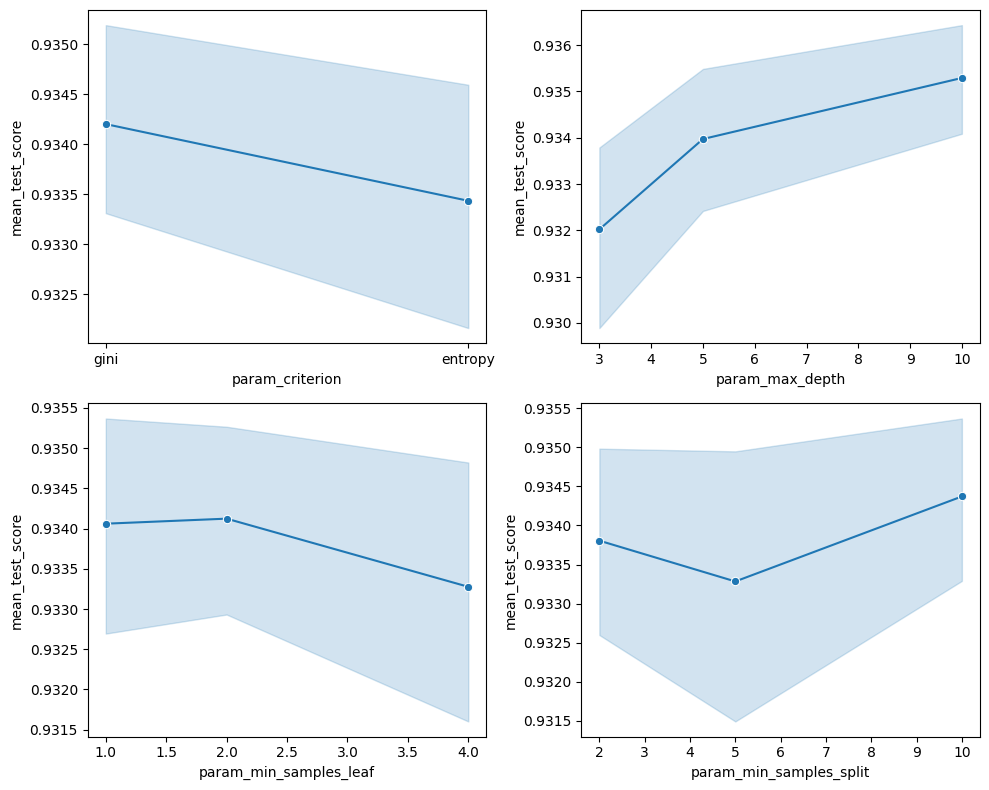

In [19]:
results = pd.DataFrame(grid_search.cv_results_)
param_columns = [col for col in results if col.startswith("param_")]
results = results[param_columns + ["mean_test_score"]]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, param in enumerate(param_columns):
    sns.lineplot(x=param, y="mean_test_score", marker="o", ax=axes[i], data=results)
plt.tight_layout()
plt.show()

### Visualize ROC Curve


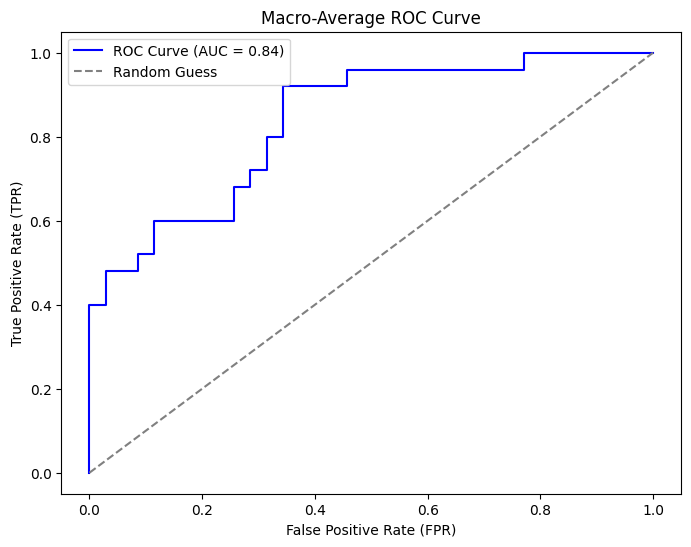

In [20]:
best_model = RandomForestClassifier(
    criterion="entropy", max_depth=3, min_samples_leaf=2
)
best_model.fit(X_train, y_train)
y_score = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = mt.roc_curve(y_test, y_score)
roc_auc = mt.roc_auc_score(y_test, y_score, average="macro")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=(f"ROC Curve (AUC = {roc_auc:.2f})"))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Macro-Average ROC Curve")
plt.legend()
plt.show()

### Evaluate model using optimized threshold


In [21]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_score = (y_score >= optimal_threshold).astype(int)
metrics.evaluate(y_test, y_score, "Random Forest")

## Logistic Regression


### Load Model


In [22]:
model = LogisticRegression()
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Find best parameter using GridSearchCV


In [23]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc')

### Visualize ROC Curve


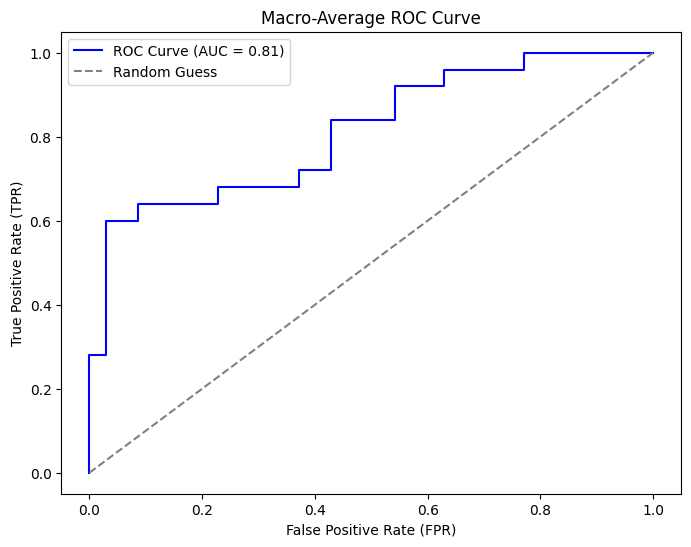

In [24]:
best_model = LogisticRegression(C=1, solver="saga")
best_model.fit(X_train, y_train)
y_score = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = mt.roc_curve(y_test, y_score)
roc_auc = mt.roc_auc_score(y_test, y_score, average="macro")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=(f"ROC Curve (AUC = {roc_auc:.2f})"))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Macro-Average ROC Curve")
plt.legend()
plt.show()

### Evaluate model using optimized threshold


In [25]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_score = (y_score >= optimal_threshold).astype(int)
metrics.evaluate(y_test, y_score, "Logistic Regression")

### Compare Models' Performance


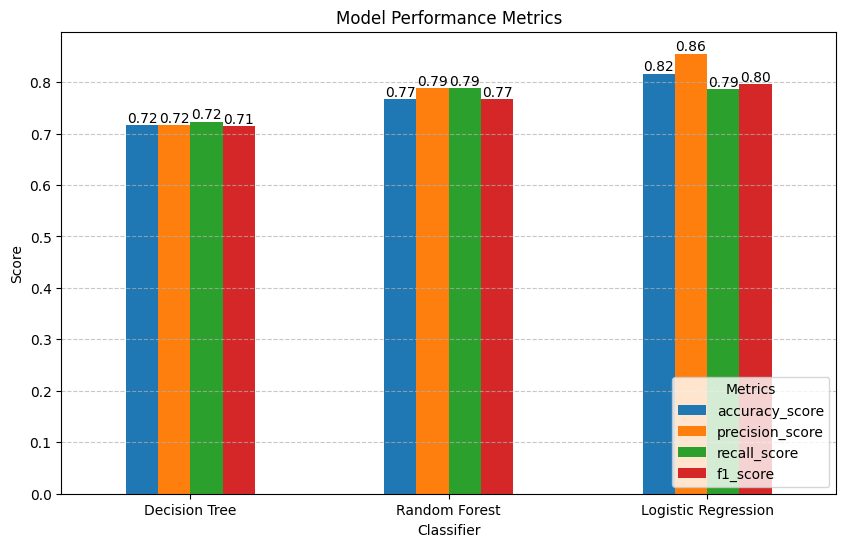

In [26]:
df_metrics = pd.DataFrame(metrics.to_dict())
df_metrics.set_index("classifier", inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))
df_metrics.plot(kind="bar", ax=ax)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")
plt.xlabel("Classifier")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.title("Model Performance Metrics")
plt.legend(title="Metrics", loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()